In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
t_train = pd.read_csv('titanic_train.csv')

In [5]:
t_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

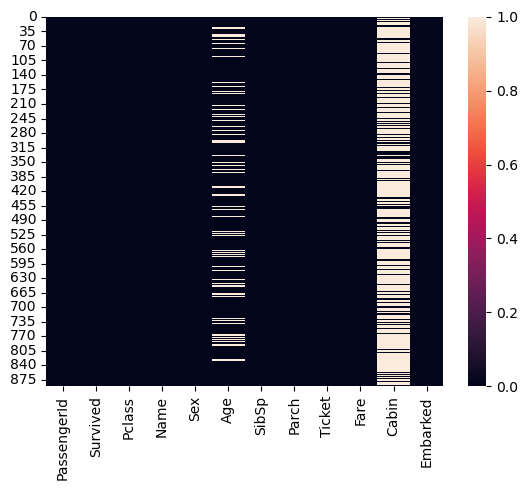

In [6]:
sns.heatmap(t_train.isnull())

Data cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

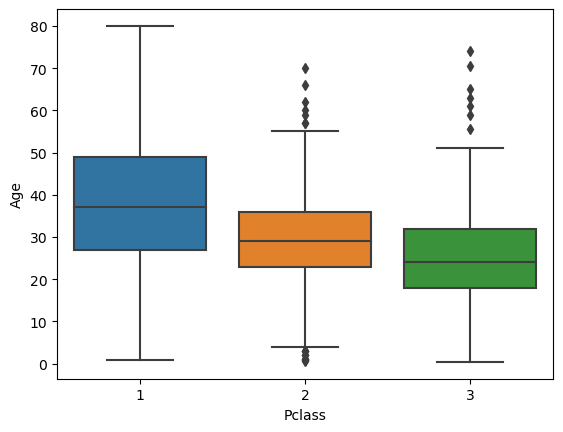

In [14]:
sns.boxplot(x='Pclass',y='Age',data=t_train)


In [15]:
def find(nums):
    age=nums[0]
    pclass=nums[1]
    if(pd.isnull(age)):
        if(pclass==1):
            return 37
        elif(pclass==2):
            return 29
        else:
            return 24
    else:
        return age

In [20]:
t_train['Age']=t_train[['Age','Pclass']].apply(lambda x:find(x),axis=1)

In [21]:
t_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,NaN,S


<Axes: >

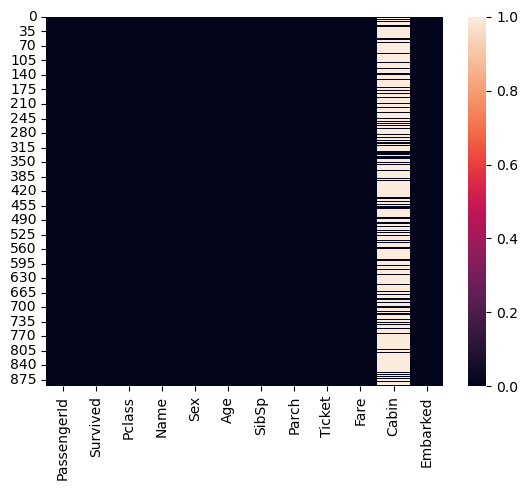

In [22]:
sns.heatmap(t_train.isnull())

In [25]:
t_train.drop('Cabin',axis=1,inplace=True)

In [26]:
t_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S


In [ ]:
t_train.dropna(inplace=True)

<Axes: >

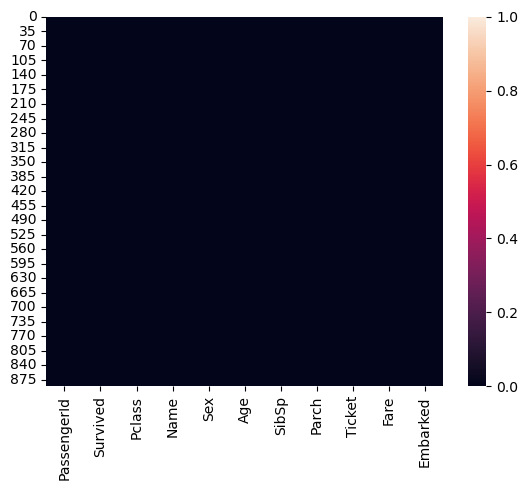

In [27]:
sns.heatmap(t_train.isnull())

In [28]:
t_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [29]:
t_train.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [30]:
t_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,24,1,0,7.2500,S
1,1,1,female,37,1,0,71.2833,C
2,1,3,female,24,0,0,7.9250,S
3,1,1,female,37,1,0,53.1000,S
4,0,3,male,24,0,0,8.0500,S


In [40]:
sex = pd.get_dummies(t_train['Sex'],drop_first=True)
embark = pd.get_dummies(t_train['Embarked'],drop_first=True)   
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [42]:
t_train = pd.concat([t_train,sex,embark],axis=1)
t_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,24,1,0,7.2500,S,1,0,1
1,1,1,female,37,1,0,71.2833,C,0,0,0
2,1,3,female,24,0,0,7.9250,S,0,0,1
3,1,1,female,37,1,0,53.1000,S,0,0,1
4,0,3,male,24,0,0,8.0500,S,1,0,1


In [43]:
t_train.drop(['Sex','Embarked'],axis=1,inplace=True)

In [44]:
t_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,24,1,0,7.2500,1,0,1
1,1,1,37,1,0,71.2833,0,0,0
2,1,3,24,0,0,7.9250,0,0,1
3,1,1,37,1,0,53.1000,0,0,1
4,0,3,24,0,0,8.0500,1,0,1


<Axes: >

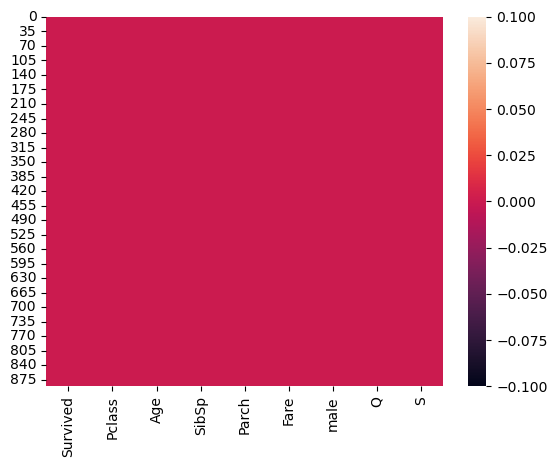

In [45]:
sns.heatmap(t_train.isnull())

In [48]:
t_train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [50]:
x=t_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]
y=t_train['Survived']

In [51]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lg = LogisticRegression()

In [56]:
lg.fit(x_train,y_train)

C:\Users\yaswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
predictions=lg.predict(x_test)

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
confusion_matrix(y_test,predictions)

array([[133,  21],
       [ 41,  73]], dtype=int64)

In [61]:
confusion_matrix(predictions,y_test)

array([[133,  41],
       [ 21,  73]], dtype=int64)

In [62]:
(133+73)/(133+21+41+73)

0.7686567164179104

In [64]:
t_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,24,1,0,7.2500,1,0,1
1,1,1,37,1,0,71.2833,0,0,0
2,1,3,24,0,0,7.9250,0,0,1
3,1,1,37,1,0,53.1000,0,0,1
4,0,3,24,0,0,8.0500,1,0,1


In [65]:
t_train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [73]:
x=t_train[['Survived', 'Pclass', 'SibSp', 'Parch','Age', 'Fare' , 'Q',
       'S']]

y=t_train['male']

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=1)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
lp_age = LogisticRegression()

In [77]:
lp_age.fit(x_train,y_train)

C:\Users\yaswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
predictions_of_age = lp_age.predict(x_test)

In [79]:
confusion_matrix(predictions_of_age,y_test)

array([[ 99,  63],
       [ 30, 165]], dtype=int64)

In [80]:
(99+165)/(99+63+30+165)

0.7394957983193278